In [1]:
import pandas as pd #reading dataset
import matplotlib as mpl    #plotting, visualization
import matplotlib.pyplot as plt
import tensorflow as tf #building model
from tensorflow.keras.models import Model
import numpy as np  #playing output with model
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import sys
sys.path.append('../../../')   # Add parent directory to Python path
from utils.Plots import *
RANDOM_SEED = 42


In [2]:
df = pd.read_csv('../../../data/handlebar/Accelerometer_data_combined_segmented_curb_height_overlap_50.csv') 
#df.drop('Unnamed: 0', axis=1, inplace=True)
df


,curb_height,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0.0,8.762772,8.753204,8.762772,8.781937,8.753204,8.748413,8.738831,8.748413,8.743622,...,8.786728,8.801086,8.820236,8.786728,8.777145,8.772354,8.781937,8.801086,8.781937,8.753204
1,0.0,8.762772,8.762772,8.748413,8.767563,8.729263,8.695740,8.724472,8.767563,8.767563,...,8.753204,8.772354,8.786728,8.781937,8.786728,8.777145,8.738831,8.820236,8.738831,8.757996
2,0.0,8.781937,8.796295,8.772354,8.772354,8.772354,8.786728,8.781937,8.801086,8.767563,...,8.777145,8.753204,8.767563,8.762772,8.762772,8.753204,8.748413,8.762772,8.772354,8.767563
3,0.0,8.781937,8.753204,8.801086,8.753204,8.829819,8.753204,8.786728,8.815445,8.762772,...,8.805878,8.796295,8.781937,8.801086,8.810669,8.796295,8.805878,8.791504,8.791504,8.772354
4,0.0,8.757996,8.762772,8.777145,8.767563,8.786728,8.777145,8.753204,8.757996,8.777145,...,8.757996,8.757996,8.772354,8.767563,8.757996,8.743622,8.777145,8.743622,8.786728,8.796295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,4.0,7.584824,-7.819458,-16.127350,-5.003876,9.758774,20.274094,23.314743,12.780243,2.384628,...,-2.858673,5.803543,11.769897,7.738068,8.834610,6.995865,9.155426,15.145721,13.752289,1.455673
3723,4.0,12.555191,15.629349,11.851303,11.851303,5.707779,2.020706,16.768997,33.877960,34.648895,...,-6.746857,-2.638412,9.390060,6.876144,15.078690,15.078690,7.762009,10.433929,11.362884,11.501739
3724,4.0,6.268021,19.474442,17.611755,12.421112,3.189072,-2.624039,-2.992752,12.392395,14.432251,...,-0.986404,6.153091,15.998062,23.324310,14.547165,12.928696,9.595963,10.505753,10.831375,6.464340
3725,4.0,11.501739,10.500977,-0.569824,25.708939,31.627410,47.160980,22.486343,4.151550,-6.689407,...,-10.055649,13.192047,29.079971,28.222855,8.341400,1.987183,3.390182,13.661316,20.796036,15.571884


In [3]:
#scaling data, because neural network works better with scaled data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.iloc[:, 1:])

In [4]:
# Convert the scaled data back to DataFrames for further processing
train_data_scaled_df = pd.DataFrame(data_scaled, columns=df.iloc[:, 1:].columns)
# Add the curb_height column back
train_data_scaled_df['curb_height'] = df['curb_height']
train_data_scaled_df.shape

(3727, 101)

In [5]:
# Filter and slice the data
normal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_height'] == 0.0].iloc[:, :-1]
abnormal_train_data_scaled_one = train_data_scaled_df[train_data_scaled_df['curb_height'] == 1.0].iloc[:, :-1]
abnormal_train_data_scaled_two = train_data_scaled_df[train_data_scaled_df['curb_height'] == 2.0].iloc[:, :-1]
abnormal_train_data_scaled_three = train_data_scaled_df[train_data_scaled_df['curb_height'] == 3.0].iloc[:, :-1]
abnormal_train_data_scaled_four = train_data_scaled_df[train_data_scaled_df['curb_height'] == 4.0].iloc[:, :-1]

In [6]:
# Cast to float32
normal_train_data_scaled = normal_train_data_scaled.astype("float32")
abnormal_train_data_scaled_one = abnormal_train_data_scaled_one.astype("float32")
abnormal_train_data_scaled_two = abnormal_train_data_scaled_two.astype("float32")
abnormal_train_data_scaled_three = abnormal_train_data_scaled_three.astype("float32")
abnormal_train_data_scaled_four = abnormal_train_data_scaled_four.astype("float32")

In [7]:
load_model = tf.keras.models.load_model('../../../models/autoencoder_best.keras')

111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


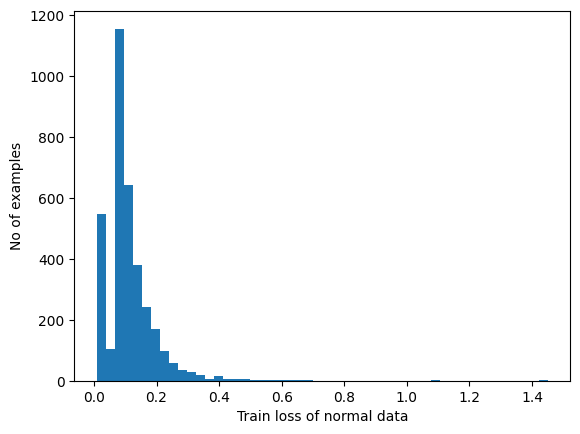

In [8]:
#Plot the reconstruction error on normal data from the training set
reconstructions_normal = load_model.predict(normal_train_data_scaled)
train_loss_normal = tf.keras.losses.mae(reconstructions_normal, normal_train_data_scaled)

plt.hist(train_loss_normal[None,:], bins=50)
plt.xlabel("Train loss of normal data")
plt.ylabel("No of examples")
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


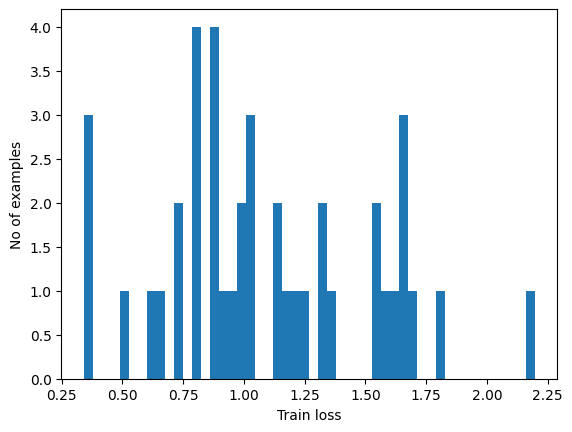

In [9]:
#Plot the reconstruction error on abnormal data from the training set
reconstructions_abnormal_one = load_model.predict(abnormal_train_data_scaled_one)
train_loss_abnormal_one = tf.keras.losses.mae(reconstructions_abnormal_one, abnormal_train_data_scaled_one)

plt.hist(train_loss_abnormal_one[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


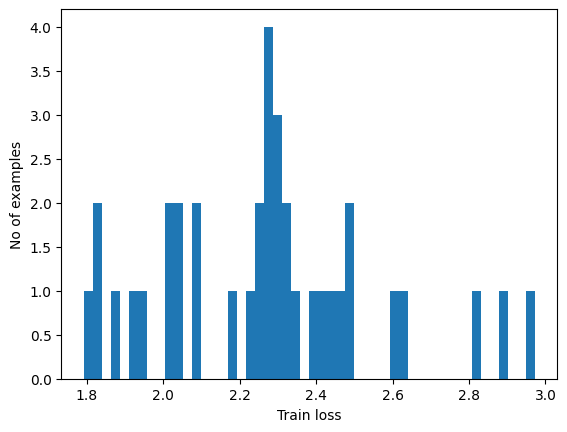

In [10]:
#Plot the reconstruction error on abnormal data from the training set
reconstructions_abnormal_two = load_model.predict(abnormal_train_data_scaled_two)
train_loss_abnormal_two = tf.keras.losses.mae(reconstructions_abnormal_two, abnormal_train_data_scaled_two)

plt.hist(train_loss_abnormal_two[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


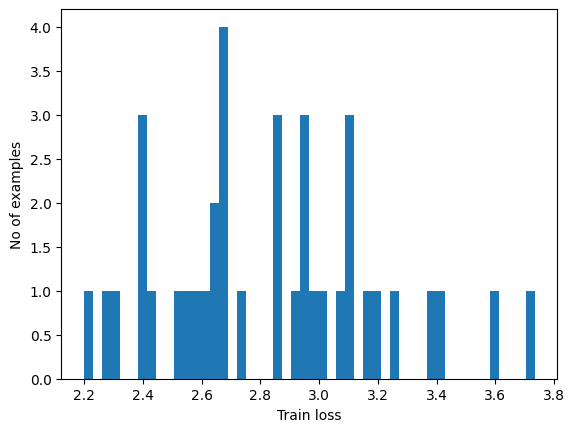

In [11]:
#Plot the reconstruction error on abnormal data from the training set
reconstructions_abnormal_three = load_model.predict(abnormal_train_data_scaled_three)
train_loss_abnormal_three = tf.keras.losses.mae(reconstructions_abnormal_three, abnormal_train_data_scaled_three)

plt.hist(train_loss_abnormal_three[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


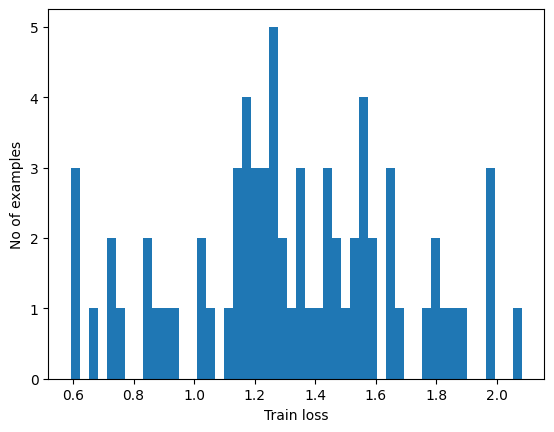

In [12]:
#Plot the reconstruction error on abnormal data from the training set
reconstructions_abnormal_four = load_model.predict(abnormal_train_data_scaled_four)
train_loss_abnormal_four = tf.keras.losses.mae(reconstructions_abnormal_four, abnormal_train_data_scaled_four)

plt.hist(train_loss_abnormal_four[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

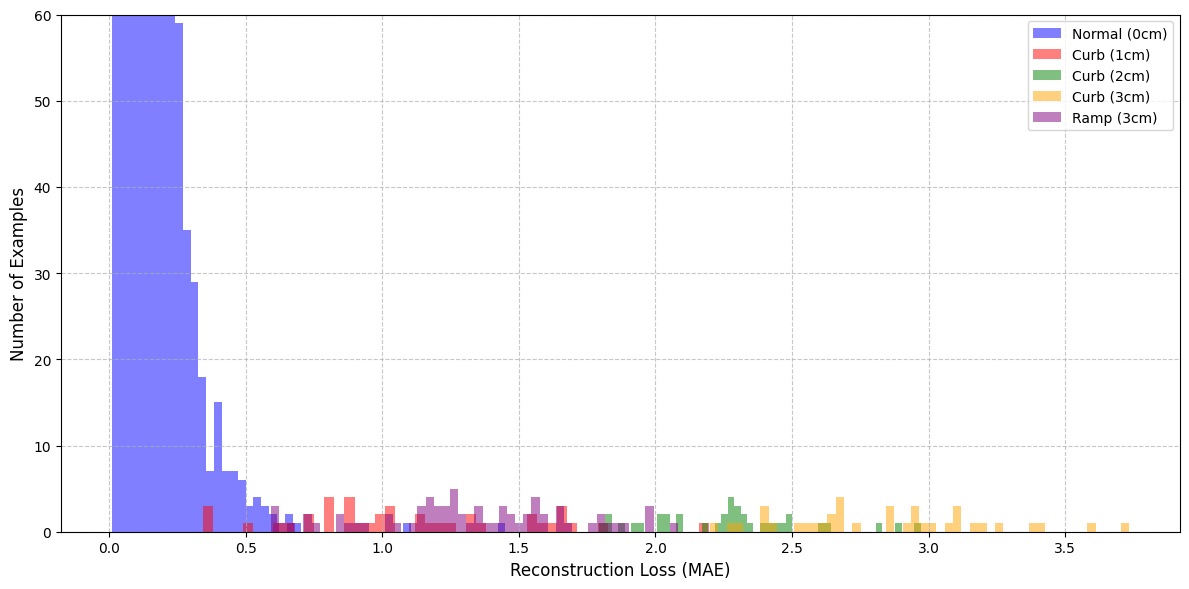

In [16]:
# Create figure with specified size
plt.figure(figsize=(12, 6))

# Plot histograms for each type of data
plt.hist(train_loss_normal[None,:], bins=50, alpha=0.5, label='Normal (0cm)', color='blue')
plt.hist(train_loss_abnormal_one[None,:], bins=50, alpha=0.5, label='Curb (1cm)', color='red')
plt.hist(train_loss_abnormal_two[None,:], bins=50, alpha=0.5, label='Curb (2cm)', color='green')
plt.hist(train_loss_abnormal_three[None,:], bins=50, alpha=0.5, label='Curb (3cm)', color='orange')
plt.hist(train_loss_abnormal_four[None,:], bins=50, alpha=0.5, label='Ramp (3cm)', color='purple')

# Customize the plot
plt.xlabel('Reconstruction Loss (MAE)', fontsize=12)
plt.ylabel('Number of Examples', fontsize=12)
plt.ylim(0, 60)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)

# Make axis labels more readable
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()